In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
from SharedX import ShareXaxis
from UniversalColor import UniversalColor
from legend_shadow import legend_shadow
from scipy.io import readsav
import spiceypy as spice

import os

UC = UniversalColor()
UC.set_palette()

In [2]:
target = 'Ganymede'

In [ ]:
savpath = "/Users/shin/Documents/Research/Juno/UVS/Satellite_Footpaths_Shin/Output_v2_PaperHue2023/PJ01/IFP_info_v900km_fixed.sav"
data = readsav(savpath)
print(type(data))
print(data.keys())
variable = data['fp_info']
hemisphere = variable['HEMISPHERE'][0]
print(hemisphere)

<class 'scipy.io._idl.AttrDict'>
dict_keys(['fp_info'])
[b'South' b'South' b'South' b'South' b'South' b'South' b'South' b'South'
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' ''
 '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '' '

In [4]:
# 実データが格納されているかどうか
# 'MIDTIME_ET'を用いてスライス位置を決定する
MIDTIME_ET = np.array(variable['MIDTIME_ET'][0])
idx = np.where(MIDTIME_ET>0)

LON_MAW = np.array(variable['LON_MAW'][0])[idx]
LON_TEB = np.array(variable['LON_TEB'][0])[idx]

print(idx[0].size)

hemisphere = np.array(variable['HEMISPHERE'][0])
np.where(hemisphere==b'South')

8


(array([0, 1, 2, 3, 4, 5, 6, 7]),)

In [5]:
# データサイズを調べる
datasize = 0
PJ_start = 0
PJ_end = 43

for i in np.arange(PJ_start,PJ_end,1,dtype=int):
    i += 1
    if i == 2:
        continue
    if i < 10:
        PJ = 'PJ0'+str(i)
    else:
        PJ = 'PJ'+str(i)
        
    savpath = '/Users/shin/Documents/Research/Juno/UVS/Satellite_Footpaths_Shin/Output_v2_PaperHue2023/'+PJ+'/'+target[0]+'FP_info_v900km_fixed.sav'
    if os.path.isfile(savpath):
        savdata = readsav(savpath)
    else:
        continue

    variable = savdata['fp_info']

    # 'MIDTIME_ET'を用いてスライス位置を決定する
    MIDTIME_ET = np.array(variable['MIDTIME_ET'][0])
    idx = np.where(MIDTIME_ET>0)

    datasize += idx[0].size

print(datasize)

561


In [6]:
# データの読み込み
lon_MAW_arr = np.zeros(datasize)
lon_TEB_arr = np.zeros(datasize)
err_lon_MAW_arr = np.zeros(datasize)
err_lon_TEB_arr = np.zeros(datasize)
lat_MAW_arr = np.zeros(datasize)
lat_TEB_arr = np.zeros(datasize)
err_lat_MAW_arr = np.zeros(datasize)
err_lat_TEB_arr = np.zeros(datasize)
moon_s3long_arr = np.zeros(datasize)
et_arr = np.zeros(datasize)
hemisphere_arr = [None]*datasize

start = 0
for i in np.arange(PJ_start,PJ_end,1,dtype=int):
    i += 1
    if i == 2:
        continue
    if i < 10:
        PJ = 'PJ0'+str(i)
    else:
        PJ = 'PJ'+str(i)
    
    savpath = '/Users/shin/Documents/Research/Juno/UVS/Satellite_Footpaths_Shin/Output_v2_PaperHue2023/'+PJ+'/'+target[0]+'FP_info_v900km_fixed.sav'
    if os.path.isfile(savpath):
        savdata = readsav(savpath)
    else:
        continue
    
    variable = savdata['fp_info']

    # 'MIDTIME_ET'を用いてスライス位置を決定する
    MIDTIME_ET = np.array(variable['MIDTIME_ET'][0])
    idx = np.where(MIDTIME_ET>0)
    end = start+idx[0].size

    lon_MAW_arr[start:end] = np.array(variable['LON_MAW'][0])[idx]
    lon_TEB_arr[start:end] = np.array(variable['LON_TEB'][0])[idx]
    err_lon_MAW_arr[start:end] = np.array(variable['LON_MAW_ERROR'][0])[idx]
    err_lon_TEB_arr[start:end] = np.array(variable['LON_TEB_ERROR'][0])[idx]
    lat_MAW_arr[start:end] = np.array(variable['LAT_MAW'][0])[idx]
    lat_TEB_arr[start:end] = np.array(variable['LAT_TEB'][0])[idx]
    err_lat_MAW_arr[start:end] = np.array(variable['LAT_MAW_ERROR'][0])[idx]
    err_lat_TEB_arr[start:end] = np.array(variable['LAT_TEB_ERROR'][0])[idx]
    moon_s3long_arr[start:end] = np.array(variable['SIII_LON'][0])[idx]
    et_arr[start:end] = np.array(variable['MIDTIME_ET'][0])[idx]
    hemisphere_arr[start:end] = variable['HEMISPHERE'][0][idx]

    start = end

# データがない部分はnp.nanで置き換える
nonumber = np.where(lon_MAW_arr<-100)
moon_s3long_arr[nonumber] = np.nan
lon_MAW_arr[nonumber] = np.nan 
err_lon_MAW_arr[nonumber] = np.nan
lat_MAW_arr[nonumber] = np.nan 
err_lat_MAW_arr[nonumber] = np.nan

for i in nonumber[0]:
    hemisphere_arr[i] = b'NaN'

print(lon_MAW_arr)

[286.86288452 297.65060425 298.58831787 299.26602173 301.54779053
 158.84208679 159.10417175 159.15010071 160.53495789 161.02191162
 161.27416992 162.03631592 163.22077942 163.57583618 163.89982605
 166.23797607 166.81669617 167.00204468 167.16265869 167.54666138
          nan          nan          nan 260.92492676 261.10345459
 261.89801025 261.89752197          nan 263.57974243 232.04110718
 255.91609192  11.28816509  14.57319927  14.8186512   15.20534897
  16.05647278          nan  19.27023315  19.39015007  19.84479332
  27.56028175          nan  28.52954292  29.45454597  29.84618759
  34.27799606  34.43139267 108.47865295 108.97602844          nan
 109.91548157 111.08333588 192.44017029 192.77175903 192.99629211
 193.25146484 193.52507019 193.68986511 193.91616821 194.58174133
 194.68406677 195.03860474 195.42976379          nan 200.86367798
 201.15318298 201.01283264 204.980896   208.36074829 208.53224182
 208.88778687 209.21867371 209.47311401 322.82449341 322.94815063
 323.42614

In [7]:
print(nonumber[0])

[ 20  21  22  27  36  41  49  63  90  91  92 100 115 133 161 162 163 164
 170 171 176 177 215 221 227 230 234 244 262 263 265 270 271 272 308 309
 330 332 334 340 341 368 369 370 371 372 373 374 375 376 377 384 389 399
 400 401 415 416 417 448 453 454 455 456 458 459 460 461 488 492 493 494
 495 496 497 498 499 500 507 512 516 520 522 523 524 526 527 531 533 535
 538 541 542 543 544 545 546 547 548 549 550 554]


In [8]:
print(hemisphere_arr)

[b'South', b'South', b'South', b'South', b'South', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'NaN', b'NaN', b'NaN', b'South', b'South', b'South', b'South', b'NaN', b'South', b'North', b'North', b'South', b'South', b'South', b'South', b'South', b'NaN', b'South', b'South', b'South', b'South', b'NaN', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'NaN', b'South', b'South', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'NaN', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'North', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'NaN', b'NaN', b'NaN', b'South', b'South', b'South', b'South', b'South', b'South', b'South', b'NaN', b'South', b'S

In [9]:
print(nonumber)

(array([ 20,  21,  22,  27,  36,  41,  49,  63,  90,  91,  92, 100, 115,
       133, 161, 162, 163, 164, 170, 171, 176, 177, 215, 221, 227, 230,
       234, 244, 262, 263, 265, 270, 271, 272, 308, 309, 330, 332, 334,
       340, 341, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 384,
       389, 399, 400, 401, 415, 416, 417, 448, 453, 454, 455, 456, 458,
       459, 460, 461, 488, 492, 493, 494, 495, 496, 497, 498, 499, 500,
       507, 512, 516, 520, 522, 523, 524, 526, 527, 531, 533, 535, 538,
       541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 554]),)


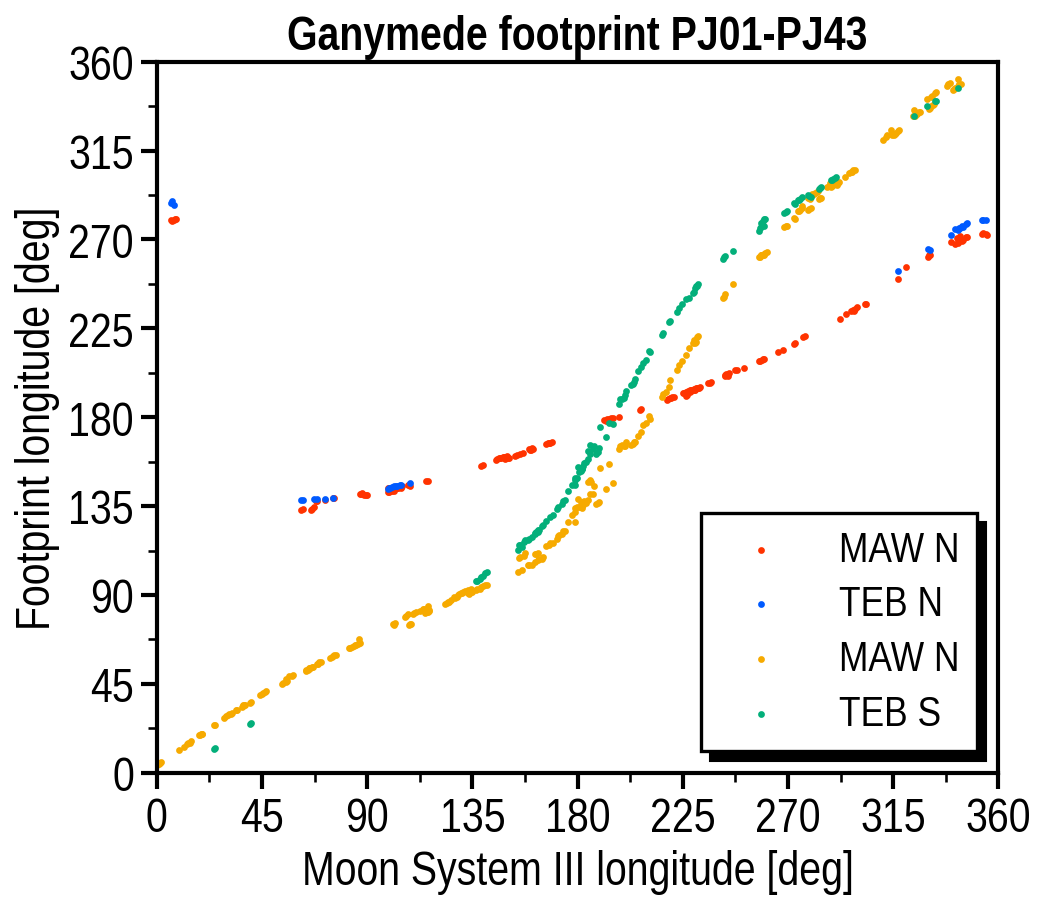

In [10]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(7,6), ticksize=1.5,
                dpi='M')
F.initialize()

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45))
F.set_yaxis(ax_idx=0, label='Footprint longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45))

north = np.where(np.array(hemisphere_arr)==b'North')
F.ax.scatter(moon_s3long_arr[north], lon_MAW_arr[north], color=UC.red, s=5, label='MAW N')
F.ax.scatter(moon_s3long_arr[north], lon_TEB_arr[north], color=UC.blue, s=5, label='TEB N')

south = np.where(np.array(hemisphere_arr)==b'South')
F.ax.scatter(moon_s3long_arr[south], lon_MAW_arr[south], color=UC.orange, s=5, label='MAW N')
F.ax.scatter(moon_s3long_arr[south], lon_TEB_arr[south], color=UC.green, s=5, label='TEB S')

F.ax.set_title(target+' footprint PJ01-PJ43', fontsize=F.fontsize, weight='bold')

legend = F.legend(ax_idx=0, loc='lower right')
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

In [11]:
spice.furnsh('/Users/shin/Documents/Research/Jupiter/Codes/HST/kernel/cassMetaK.txt')
et_hst = spice.str2et('2014-01-16T00:00:00')
print(et_hst)

443102467.18435526


In [12]:
def moonS3wlon(et:float, MOON:str):
    # Juno's position seen from Jupiter in IAU_JUPITER coordinate.
    _, lightTimes = spice.spkpos(
        targ='JUNO', et=et, ref='IAU_JUPITER', abcorr='LT+S', obs='JUPITER'
    )

    # Moon's position seen from Jupiter in IAU_JUPITER coordinate.
    pos, _ = spice.spkpos(
        targ=MOON, et=et, ref='IAU_JUPITER', abcorr='none', obs='JUPITER'
    )

    posx, posy, posz = pos[0], pos[1], pos[2]
    posr = np.sqrt(posx**2 + posy**2 + posz**2)
    # postheta = np.arccos(posz/posr)
    posphi = np.arctan2(posy, posx)
    if posphi < 0:
        Sys3 = np.degrees(-posphi)
    else:
        Sys3 = np.degrees(2*np.pi - posphi)

    return Sys3

In [13]:
savpath = "/Users/shin/Documents/Research/Juno/UVS/Codes/data/Satellite_FP_JRM33.sav"
data = readsav(savpath)
print(type(data))
print(data.keys())
variable = data['gfp_contour_n']

print(variable[1500:1600])
# >>> Satellite S3 w-longitude, Footprint S3 w-longitude, Footprint latitude

print(variable[1500:1600][:,0])

<class 'scipy.io._idl.AttrDict'>
dict_keys(['ifp_contour_n', 'ifp_contour_s', 'efp_contour_n', 'efp_contour_s', 'gfp_contour_n', 'gfp_contour_s', 'cfp_contour_s_kk', 'cfp_contour_s_con2020', 'cfp_contour_n_kk', 'cfp_contour_n_con2020'])
[[ 75.       140.13      63.929996]
 [ 75.05     140.14188   63.915646]
 [ 75.1      140.15373   63.90129 ]
 [ 75.15     140.16557   63.886936]
 [ 75.200005 140.17741   63.872578]
 [ 75.25     140.18924   63.858223]
 [ 75.3      140.20105   63.843864]
 [ 75.35     140.21284   63.829506]
 [ 75.4      140.22462   63.815147]
 [ 75.450005 140.2364    63.800785]
 [ 75.5      140.24817   63.786423]
 [ 75.55     140.25992   63.772057]
 [ 75.6      140.27165   63.757694]
 [ 75.65     140.28337   63.74333 ]
 [ 75.700005 140.29509   63.728962]
 [ 75.75     140.3068    63.714596]
 [ 75.8      140.3185    63.700226]
 [ 75.85     140.33017   63.68586 ]
 [ 75.9      140.34183   63.671486]
 [ 75.950005 140.35349   63.657116]
 [ 76.       140.36513   63.642742]
 [ 76.0

In [14]:
def S3EQ(fpwlon, fplat, hemisphere, MOON: str):
    """_summary_

    Args:
        fpwlon: System III longitude of footprint aurora at Jupiter's upper atmosphere [deg]
        satmodel: footprint model from magnetic field model
        MOON: select from IO, EUROPA, GANYMEDE

    Returns:
        y: System III longitude of instantaneous field line at the orbital plane
    """

    if hemisphere == b'North':
        satmodel = np.recfromtxt('data/JRM33/satellite_foot_N.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])
    elif hemisphere == b'South':
        satmodel = np.recfromtxt('data/JRM33/satellite_foot_S.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])
    else:
        # print('Hemisphere not found')
        return np.nan

    # eqwlon = satmodel.wlon[:-1]     # Satellite System III longitude at the equator

    savpath = "/Users/shin/Documents/Research/Juno/UVS/Codes/data/Satellite_FP_JRM33.sav"
    data = readsav(savpath)

    if (MOON == 'IO') or (MOON == 'Io'):
        s3wlon = satmodel.iowlon[:-1]
        s3lat = satmodel.galat[:-1]
        data_name = 'ifp_contour'

    elif (MOON == 'EUROPA') or (MOON == 'Europa'):
        s3wlon = satmodel.euwlon[:-1]
        s3lat = satmodel.galat[:-1]
        data_name = 'efp_contour'

    elif (MOON == 'GANYMEDE') or (MOON == 'Ganymede'):
        s3wlon = satmodel.gawlon[:-1]
        s3lat = satmodel.galat[:-1]
        data_name = 'gfp_contour'

    if hemisphere == b'North':
        variable = data[data_name+'_n']
        eqwlon = variable[0:-1][:,0]
        s3wlon = variable[0:-1][:,1]
        s3lat = variable[0:-1][:,2]

    elif hemisphere == b'South':
        variable = data[data_name+'_s']
        eqwlon = variable[0:-1][:,0]
        s3wlon = variable[0:-1][:,1]
        s3lat = variable[0:-1][:,2]

        """
        if hemisphere == b'North':
            if fplat > 80:
                slice_idx = np.where(s3lat>80)
                s3wlon = s3wlon[slice_idx]
                eqwlon = eqwlon[slice_idx]
            elif (fplat <= 80) and (fplat > 60):
                slice_idx = np.where((s3lat<=80)&(s3lat>60))
                s3wlon = s3wlon[slice_idx]
                eqwlon = eqwlon[slice_idx]
            else:
                slice_idx = np.where(s3lat<=60)
                s3wlon = s3wlon[slice_idx]
                eqwlon = eqwlon[slice_idx]
        """

    # Search the System III index
    distance = (s3wlon[:-1]-fpwlon)**2 + (s3lat[:-1]-fplat)**2
    
    argsorted = np.argsort(distance, axis=0)
    # s3_idx0, s3_idx1 = argsorted[0], argsorted[1]

    s3_idx0 = argsorted[0]
    s3wlon0 = s3wlon[s3_idx0]
    eqwlon0 = eqwlon[s3_idx0]

    """
    if s3_idx0 == 0:
        if abs(s3wlon[1]-fpwlon) > abs(s3wlon[-2]-fpwlon):
            s3_idx1 = -2
        else:
            s3_idx1 = 1
    elif s3_idx0 == s3wlon.size-1:
        if abs(s3wlon[0]-fpwlon) > abs(s3wlon[s3_idx0-1]-fpwlon):
            s3_idx1 = s3_idx0-1
        else:
            s3_idx1 = 0
    else:
        if abs(s3wlon[s3_idx0+1]-fpwlon) > abs(s3wlon[s3_idx0-1]-fpwlon):
            s3_idx1 = s3_idx0-1
        else:
            s3_idx1 = s3_idx0+1
    """

    s3_idx1 = argsorted[1]
    s3wlon1 = s3wlon[s3_idx1]
    eqwlon1 = eqwlon[s3_idx1]

    x = fpwlon
    x0 = s3wlon0
    x1 = s3wlon1
    y0 = eqwlon0
    y1 = eqwlon1

    # print(x0, x1, y0, y1)

    if y0-y1 > 180:
        y1 += 360
    elif y1-y0 > 180:
        y0 += 360

    y = ((y1-y0)/(x1-x0))*(x-x0) + y0

    if y > 360:
        y += -360
    elif y < 0:
        y += 360

    return eqwlon0

In [15]:
# JRM33
satovalN = np.recfromtxt('data/JRM33/satellite_foot_N.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

satovalS = np.recfromtxt('data/JRM33/satellite_foot_S.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

In [16]:
spice.et2utc(et_arr[0], format_str='C', prec=2)
spice.et2utc(et_arr[-1], format_str='C', prec=2)

'2022 MAY 23 01:44:30.28'

In [17]:
print(hemisphere_arr[0])

b'South'


In [18]:
MAW_eq_arr = np.zeros(datasize)
MAW_eq_arr_0 = np.zeros(datasize)
MAW_eq_arr_1 = np.zeros(datasize)
d_MAW_eq_arr = np.zeros(datasize)
d_MAW_eq_arr_0 = np.zeros(datasize)
d_MAW_eq_arr_1 = np.zeros(datasize)
moon_eq_spice = np.zeros(datasize)

for i in range(datasize):
    moon_eq_spice[i] = moonS3wlon(et=et_arr[i], MOON=target)
    MAW_eq_arr[i] = S3EQ(lon_MAW_arr[i], lat_MAW_arr[i], hemisphere_arr[i], MOON=target)
    MAW_eq_arr_0[i] = S3EQ(lon_MAW_arr[i]+err_lon_MAW_arr[i], lat_MAW_arr[i], hemisphere_arr[i], MOON=target)
    MAW_eq_arr_1[i] = S3EQ(lon_MAW_arr[i]-err_lon_MAW_arr[i], lat_MAW_arr[i], hemisphere_arr[i], MOON=target)
    d_MAW_eq_arr[i] = moon_eq_spice[i]-MAW_eq_arr[i]
    d_MAW_eq_arr_0[i] = MAW_eq_arr_0[i]-MAW_eq_arr[i]
    d_MAW_eq_arr_1[i] = MAW_eq_arr[i]-MAW_eq_arr_1[i]

    # print(i)
    if d_MAW_eq_arr[i] < 0:
        d_MAW_eq_arr[i] += 360.
    if d_MAW_eq_arr_0[i] < 0:
        print(i)
        # d_MAW_eq_arr_0[i] = np.nan
    if d_MAW_eq_arr_1[i] < 0:
        print('   ', i)
        # d_MAW_eq_arr_0[i] = np.nan
    if d_MAW_eq_arr_1[i] > 5:
        print(i)

# データがない部分はnp.nanで置き換える
MAW_eq_arr[nonumber] = np.nan
MAW_eq_arr_0[nonumber] = np.nan
MAW_eq_arr_1[nonumber] = np.nan
d_MAW_eq_arr[nonumber] = np.nan
d_MAW_eq_arr_0[nonumber] = np.nan
d_MAW_eq_arr_1[nonumber] = np.nan
moon_eq_spice[nonumber] = np.nan

In [19]:
jdx = 2
print(hemisphere_arr[jdx])
print(lon_MAW_arr[jdx], lat_MAW_arr[jdx], err_lat_MAW_arr[jdx])
print(MAW_eq_arr[jdx], MAW_eq_arr_0[jdx], MAW_eq_arr_1[jdx])
print(d_MAW_eq_arr_0[jdx])

MAW_eq_arr_0[jdx] = S3EQ(lon_MAW_arr[jdx]+err_lon_MAW_arr[jdx], lat_MAW_arr[jdx], hemisphere_arr[jdx], MOON=target)
MAW_eq_arr_1[jdx] = S3EQ(lon_MAW_arr[jdx]-err_lon_MAW_arr[jdx], lat_MAW_arr[jdx], hemisphere_arr[jdx], MOON=target)

b'South'
298.58831787109375 -75.63936614990234 0.20333817601203918
272.6499938964844 272.8999938964844 272.3999938964844
0.25


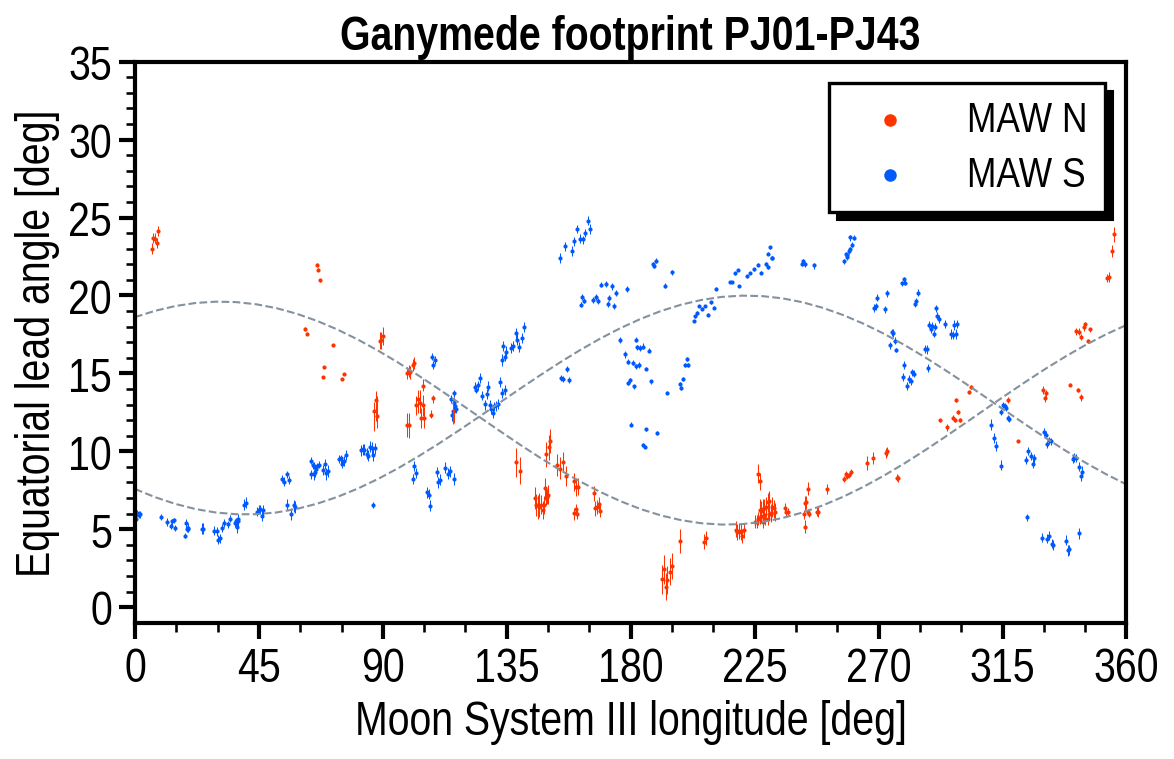

In [20]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymax = 1
if target == 'Io':
    ymax = 12
elif target == 'Europa':
    ymax = 18
elif target == 'Ganymede':
    ymax = 35

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Equatorial lead angle [deg]',
            min=-1, max=ymax,
            ticks=np.arange(0,ymax+1,5),
            ticklabels=np.arange(0,ymax+1,5),
            minor_num=5)

north = np.where(np.array(hemisphere_arr)==b'North')
F.ax.scatter(moon_s3long_arr[north], d_MAW_eq_arr[north], color=UC.red, s=1, label='MAW N')
F.ax.errorbar(moon_s3long_arr[north], d_MAW_eq_arr[north], 
              yerr=np.array([d_MAW_eq_arr_0[north], 
                             d_MAW_eq_arr_1[north]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

south = np.where(np.array(hemisphere_arr)==b'South')
F.ax.scatter(moon_s3long_arr[south], d_MAW_eq_arr[south], color=UC.blue, s=1, label='MAW S')
F.ax.errorbar(moon_s3long_arr[south], d_MAW_eq_arr[south], 
              yerr=np.array([d_MAW_eq_arr_0[south], 
                             d_MAW_eq_arr_1[south]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

F.ax.set_title(target+' footprint PJ01-PJ43', fontsize=F.fontsize, weight='bold')

x = np.linspace(0, 2*3.141592, 50)
if target=='Io':
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.plot(np.degrees(x), y_N, linestyle='--', linewidth=1, color=UC.gray)
F.ax.plot(np.degrees(x), y_S, linestyle='--', linewidth=1, color=UC.gray)

legend = F.legend(ax_idx=0, loc='upper right', markerscale=5)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

Standard deviation
MAW North 2.0562039873111884
MAW South 2.961073207525845


Text(0.99, 0.1, 'South: 2.961 deg')

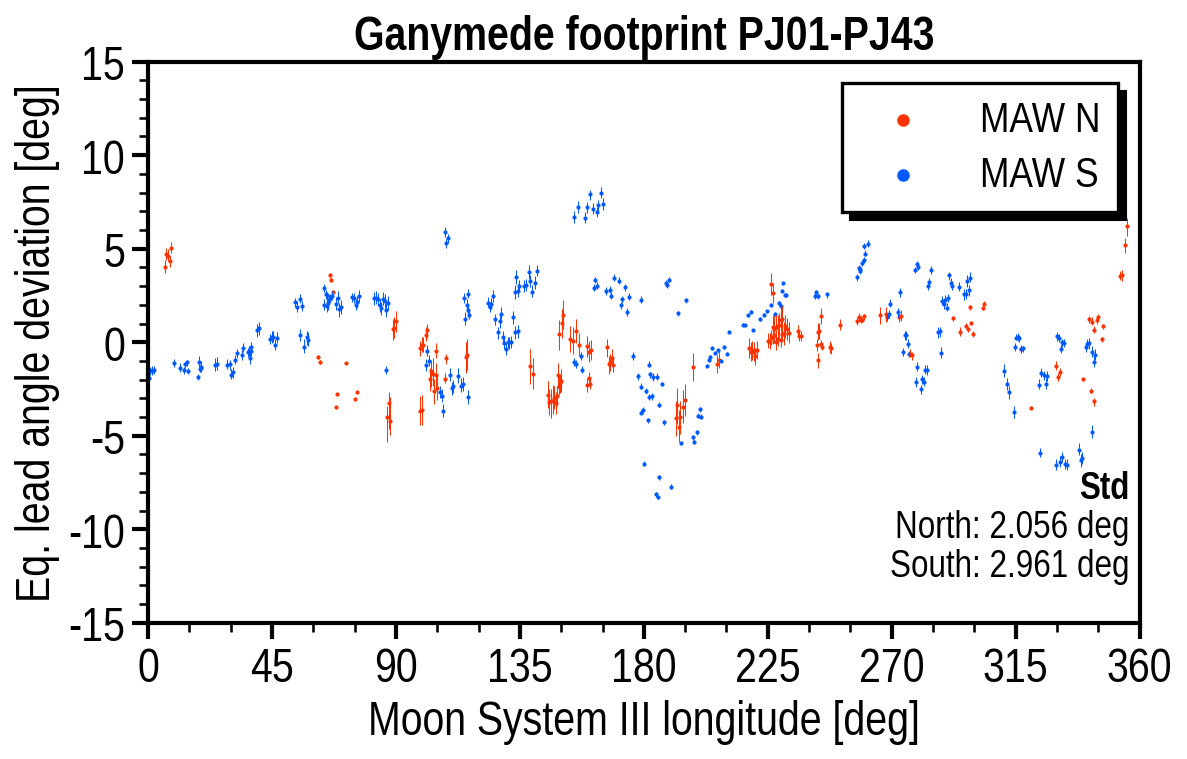

In [25]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'

F.set_figparams(nrows=1, figsize=(8,5), ticksize=1.5,
                dpi='M')
F.initialize()

ymin = 0
ymax = 1
if target == 'Io':
    ymin = -10
    ymax = 10
elif target == 'Europa':
    ymin = -10
    ymax = 10
elif target == 'Ganymede':
    ymin = -15
    ymax = 15

F.set_xaxis(label='Moon System III longitude [deg]',
            min=0, max=360,
            ticks=np.arange(0,360+1,45),
            ticklabels=np.arange(0,360+1,45),
            minor_num=3)
F.set_yaxis(ax_idx=0, label='Eq. lead angle deviation [deg]',
            min=-1, max=ymax,
            ticks=np.arange(ymin,ymax+1,5),
            ticklabels=np.arange(ymin,ymax+1,5),
            minor_num=5)

F.ax.set_title(target+' footprint PJ01-PJ43', fontsize=F.fontsize, weight='bold')

north = np.where(np.array(hemisphere_arr)==b'North')
south = np.where(np.array(hemisphere_arr)==b'South')
x0 = np.radians(moon_s3long_arr)
if target=='Io':
    x = x0[north]
    y_N = 4.26+2.64*np.cos(x)+0.50*np.sin(x)+0.20*np.cos(2*x)+0.126*np.sin(2*x)
    x = x0[south]
    y_S = 4.14-1.89*np.cos(x)-0.70*np.sin(x)+0.22*np.cos(2*x)-0.12*np.sin(2*x)
if target=='Europa':
    x = x0[north]
    y_N = 5.78+3.29*np.cos(0.99*x)+1.41*np.sin(0.99*x)
    x = x0[south]
    y_S = 7.06-3.37*np.cos(x)+0.15*np.sin(x)
if target=='Ganymede':
    x = x0[north]
    y_N = 12.45+6.16*np.cos(0.98*x)+3.64*np.sin(0.98*x)
    x = x0[south]
    y_S = 12.97-5.39*np.cos(0.99*x)-4.50*np.sin(0.99*x)

F.ax.scatter(moon_s3long_arr[north], d_MAW_eq_arr[north]-y_N, color=UC.red, s=1, label='MAW N')
F.ax.errorbar(moon_s3long_arr[north], d_MAW_eq_arr[north]-y_N, 
              yerr=np.array([d_MAW_eq_arr_0[north], 
                             d_MAW_eq_arr_1[north]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.red)

F.ax.scatter(moon_s3long_arr[south], d_MAW_eq_arr[south]-y_S, color=UC.blue, s=1, label='MAW S')
F.ax.errorbar(moon_s3long_arr[south], d_MAW_eq_arr[south]-y_S, 
              yerr=np.array([d_MAW_eq_arr_0[south], 
                             d_MAW_eq_arr_1[south]]),
              linewidth=0., markersize=0,
              elinewidth=0.5, color=UC.blue)

legend = F.legend(ax_idx=0, loc='upper right', markerscale=5)
legend_shadow(fig=F.fig, ax=F.ax, legend=legend)

print('Standard deviation')
print('MAW North', np.std(d_MAW_eq_arr[north]-y_N))
print('MAW South', np.std(d_MAW_eq_arr[south]-y_S))

F.ax.text(0.99, 0.24, 
          'Std',
          color='k', weight='bold',
          fontsize=F.fontsize*0.8,
          verticalalignment='center',
          horizontalalignment='right',
          transform=F.ax.transAxes)
F.ax.text(0.99, 0.17, 
          'North: '+str(round(np.std(d_MAW_eq_arr[north]-y_N),3))+' deg',
          color='k',
          fontsize=F.fontsize*0.8,
          verticalalignment='center',
          horizontalalignment='right',
          transform=F.ax.transAxes)
F.ax.text(0.99, 0.10, 
          'South: '+str(round(np.std(d_MAW_eq_arr[south]-y_S),3))+' deg',
          color='k',
          fontsize=F.fontsize*0.8,
          verticalalignment='center',
          horizontalalignment='right',
          transform=F.ax.transAxes)


In [22]:
north_90 = moon_s3long_arr[north]
idx_90 = np.where((north_90>80)&(north_90<95))
print(north_90[idx_90])
print(lon_MAW_arr[north][idx_90])
print(lat_MAW_arr[north][idx_90])
print(MAW_eq_arr[north][idx_90])
print(d_MAW_eq_arr[north][idx_90])

[86.79664612 87.37954712 87.96244049 88.79958344 89.37670135 89.95285797]
[140.96775818 141.02888489 141.54350281 140.82971191 140.83299255
 140.79718018]
[64.75075531 64.83900452 64.73506165 65.80078888 65.56218719 65.39982605]
[74.20000458 74.09999847 75.70000458 71.70000458 72.25       72.55000305]
[12.5945395  13.27744169 12.26033174 17.09748586 17.12460236 17.40076191]


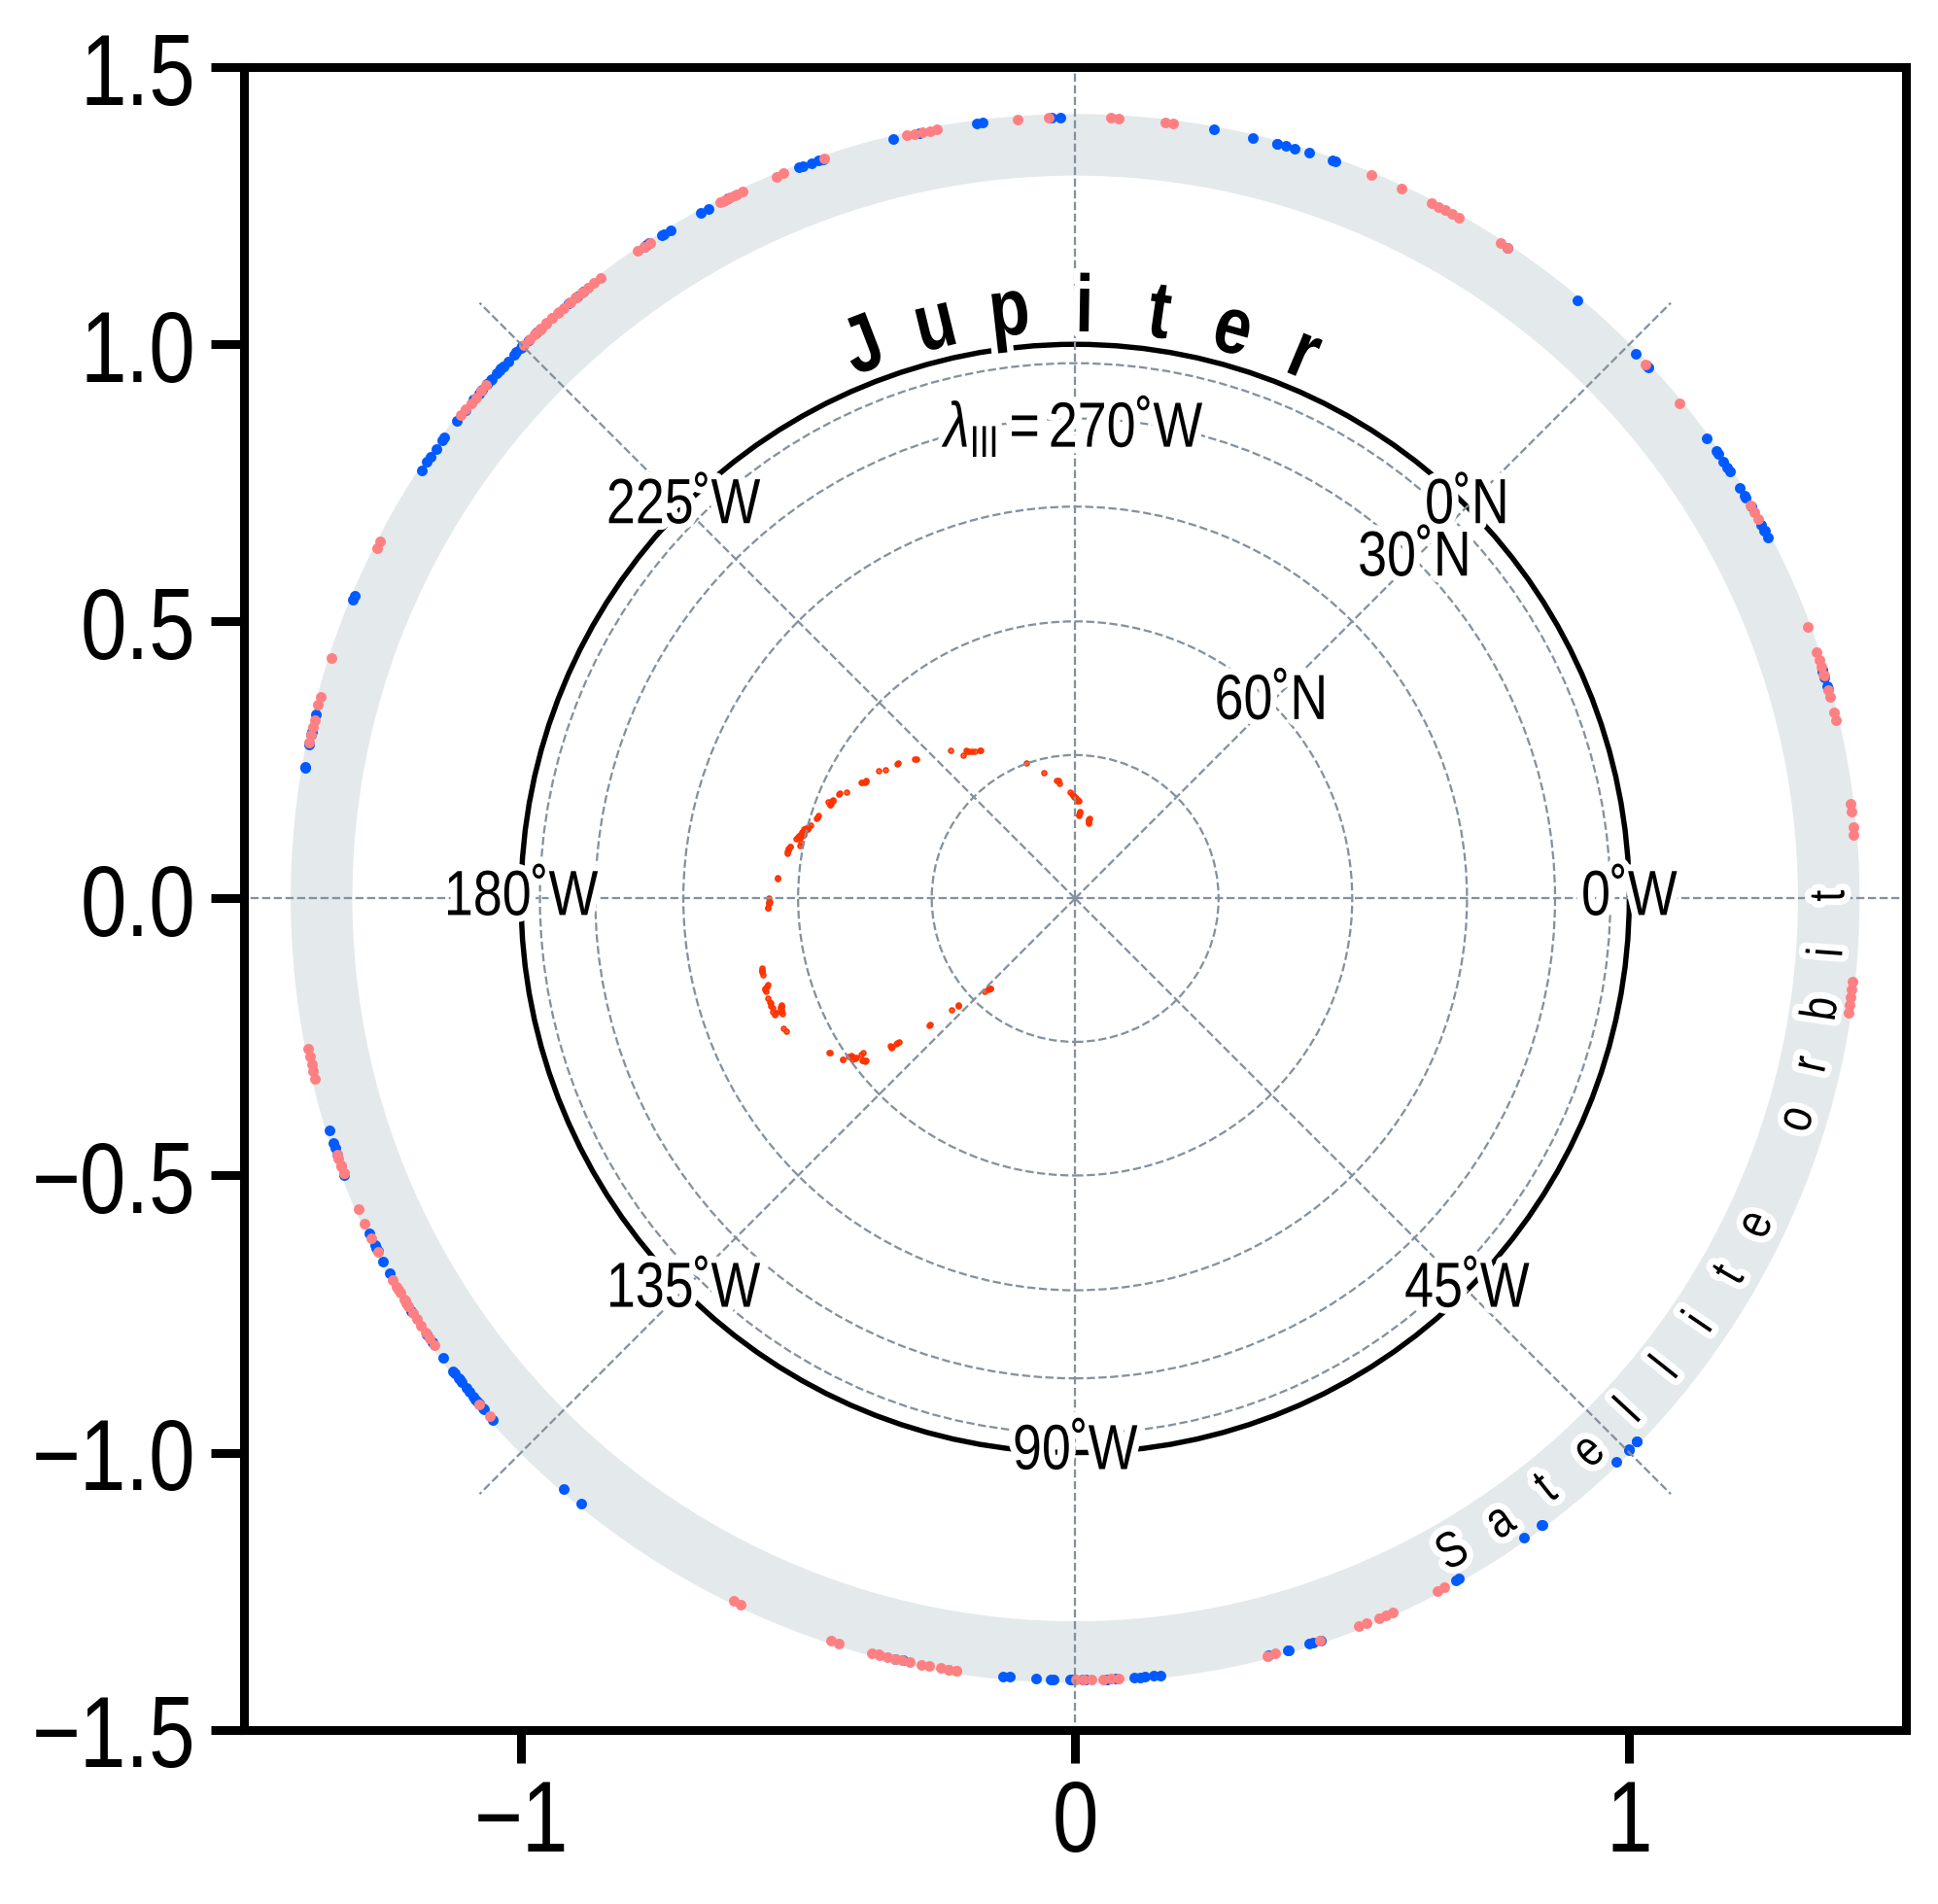

In [23]:
fontsize = 23
fig, ax = plt.subplots(figsize=(6,6), layout="constrained", dpi=326)
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)
ax.set_aspect('equal')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)

# Footprint on Jupiter
colat = np.radians(90-lat_MAW_arr[north])
elong = np.radians(360-lon_MAW_arr[north])
x = (1.0)*np.sin(colat)*np.cos(elong)
y = (1.0)*np.sin(colat)*np.sin(elong)
ax.scatter(x, y, s=0.2)

# Footprint position at the equator
colat = np.radians(90)
elong = np.radians(360-MAW_eq_arr[north])
x = (1.41)*np.sin(colat)*np.cos(elong)
y = (1.41)*np.sin(colat)*np.sin(elong)
ax.scatter(x, y, s=2, color=UC.blue, zorder=2)

# Satellite position at the equator
colat = np.radians(90)
elong = np.radians(360-moon_s3long_arr[north])
x = (1.41)*np.sin(colat)*np.cos(elong)
y = (1.41)*np.sin(colat)*np.sin(elong)
ax.scatter(x, y, s=2, color=UC.pink, zorder=2)


# 緯度のグリッド (15 deg)
for deg in np.arange(15,90,15):
    ax.add_patch(patches.Circle(
        xy=(0,0), radius=np.sin(np.radians(90-deg)), fill=False, ec=UC.gray,
        linestyle='dashed', linewidth=0.5,
        ))
for deg in np.arange(0,90,30):
    ax.text(
        np.sin(np.radians(90-deg))*np.cos(np.radians(360-315)),
        np.sin(np.radians(90-deg))*np.sin(np.radians(360-315)),
        str(deg)+'˚N',
        size=fontsize*0.63,
        # rotation=deg,
        color='k',
        horizontalalignment='center',
        verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=3.0, foreground='white')]
    )

# 経度のグリッド (45 deg)
for deg in np.arange(0,360,45):
    ax.plot(
        [0, 1.52*np.cos(np.radians(360-deg))],
        [0, 1.52*np.sin(np.radians(360-deg))],
        linestyle='dashed', linewidth=0.5, color=UC.gray
    )
for deg in np.arange(0,270,45):
    ax.text(
        1.0*np.cos(np.radians(360-deg)),
        1.0*np.sin(np.radians(360-deg)),
        str(deg)+'˚W',
        size=fontsize*0.63,
        # rotation=deg,
        color='k',
        horizontalalignment='center',
        verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=3.0, foreground='white')]
    )
ax.text(
    0.85*np.cos(np.radians(360-270)),
    0.85*np.sin(np.radians(360-270)),
    r'$\lambda_{\rm III}=$'+str(270)+'˚W',
    size=fontsize*0.63,
    # rotation=deg,
    color='k',
    horizontalalignment='center',
    verticalalignment='center',
    path_effects=[pe.withStroke(linewidth=3.0, foreground='white')]
)

# Edge of Jupiter
ax.add_patch(patches.Circle(
    xy=(0,0), radius=1.0, fill=False, ec='k', linewidth=1.2
    ))
letter = 'Jupiter'
for i in range(len(letter)):
    deg = 360-(249+7.3*i)
    ax.text(
        1.062*np.cos(np.radians(deg)),
        1.062*np.sin(np.radians(deg)),
        letter[i],
        weight='bold',
        size=fontsize*0.8,
        rotation=deg-90,
        color='k',
        horizontalalignment='center',
        verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=3.0, foreground='white')]
    )

# Satellite orbit
ax.add_patch(patches.Circle(
    xy=(0,0), radius=1.36, fill=False, ec='#E4E9EB', linewidth=14
    ))
letter = 'Satellite orbit'
for i in range(len(letter)):
    deg = 360-(60-4.3*i)
    ax.text(
        1.364*np.cos(np.radians(deg)),
        1.364*np.sin(np.radians(deg)),
        letter[i],
        size=fontsize*0.5,
        rotation=deg+90,
        color='k',
        horizontalalignment='center',
        verticalalignment='center',
        path_effects=[pe.withStroke(linewidth=3.0, foreground='white')]
    )

In [24]:
lon_MAW_arr[north]

array([158.84208679, 159.10417175, 159.15010071, 160.53495789,
       161.02191162, 161.27416992, 162.03631592, 163.22077942,
       163.57583618, 163.89982605, 166.23797607, 166.81669617,
       167.00204468, 167.16265869, 167.54666138, 232.04110718,
       255.91609192, 192.44017029, 192.77175903, 192.99629211,
       193.25146484, 193.52507019, 193.68986511, 193.91616821,
       194.58174133, 194.68406677, 195.03860474, 195.42976379,
       200.86367798, 201.15318298, 201.01283264, 204.980896  ,
       208.36074829, 208.53224182, 208.88778687, 209.21867371,
       209.47311401, 155.39253235, 155.94825745, 159.50996399,
       160.07174683, 164.00643921, 164.11047363, 164.44537354,
       180.05110168, 183.87532043, 184.03056335, 267.4781189 ,
       268.40576172, 269.04296875, 269.39306641, 269.64743042,
       271.28417969, 271.13702393, 272.93267822, 273.2623291 ,
       272.80187988, 272.43664551, 140.96775818, 141.02888489,
       141.54350281, 143.91537476, 143.94847107, 188.89